#Dataset Download
please place the csv file below in your google driv before executing the notebook

https://docs.google.com/spreadsheets/d/1NlDpBJgEbx_EOk0O5gLXmm5WI5_gfcVvg_zuiPMH0fw/edit?usp=sharing

#Data Setting

In [ ]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import sklearn


%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/diabetes.csv")

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Missing Value filling


In [ ]:
presd = data.replace({'pres':0},{'pres':None}) 
presd1 = presd.dropna() 
presd = data.replace({'pres':0}, {'pres':None}) 
#presd = presd.fillna(presd1.pres.median()) 
massd = presd.replace({'mass':0.0},{'mass':None}) 
massd1 = massd.dropna() 
massd = data.replace({'mass':0.0},{'mass':None}) 
#massd = massd.fillna(massd1.mass.median()) 
plasd = massd.replace({'plas':0}, {'plas':None}) 
plasd1 = plasd.dropna() 
#data = plasd.fillna(plasd1.plas.median()) 
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Entropy computation

In [ ]:

# descriptive features
#features = data[["Pregnancies","Glucise","BloodePressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age,]]
target = data["Outcome"]
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts = True)
    entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

Total entropy

In [ ]:
print('H(x) = ', round(entropy(target), 5))

H(x) =  0.93313


#Computing Entropy and Information Gain

In [ ]:
# IG
def InfoGain(data,split_attribute_name,target_name):
 
    # Total entropy computation
    total_entropy = entropy(data[target_name])
    print('Entropy(D) = ', round(total_entropy, 5))
    
    # weighted entropy computation
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*
                               entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name])
                               for i in range(len(vals))])
    print('H(', split_attribute_name, ') = ', round(Weighted_Entropy, 5))
 
    
    # Information gain computation
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
 
 
print('InfoGain( Pregnancies ) = ', round(InfoGain(data, "Pregnancies", "Outcome"), 5), '\n')
print('InfoGain( Glucose ) = ', round(InfoGain(data, "Glucose", "Outcome"), 5), '\n')
print('InfoGain( BloodPressure) = ', round(InfoGain(data, "BloodPressure", "Outcome"), 5), '\n')
print('InfoGain( SkinThickness ) = ', round(InfoGain(data, "SkinThickness", "Outcome"), 5), '\n')
print('InfoGain( Insulin ) = ', round(InfoGain(data, "Insulin", "Outcome"), 5), '\n')
print('InfoGain( BMI ) = ', round(InfoGain(data, "BMI", "Outcome"), 5), '\n')
print('InfoGain( DiabetesPedigreeFunction ) = ', round(InfoGain(data, "DiabetesPedigreeFunction", "Outcome"), 5), '\n')
print('InfoGain( Age ) = ', round(InfoGain(data, "Age", "Outcome"), 5), '\n')



Entropy(D) =  0.93313
H( Pregnancies ) =  0.87131
InfoGain( Pregnancies ) =  0.06183 

Entropy(D) =  0.93313
H( Glucose ) =  0.62893
InfoGain( Glucose ) =  0.3042 

Entropy(D) =  0.93313
H( BloodPressure ) =  0.87382
InfoGain( BloodPressure) =  0.05931 

Entropy(D) =  0.93313
H( SkinThickness ) =  0.85147
InfoGain( SkinThickness ) =  0.08166 

Entropy(D) =  0.93313
H( Insulin ) =  0.65604
InfoGain( Insulin ) =  0.27709 

Entropy(D) =  0.93313
H( BMI ) =  0.58932
InfoGain( BMI ) =  0.34381 

Entropy(D) =  0.93313
H( DiabetesPedigreeFunction ) =  0.28222
InfoGain( DiabetesPedigreeFunction ) =  0.65092 

Entropy(D) =  0.93313
H( Age ) =  0.79219
InfoGain( Age ) =  0.14094 



In [ ]:
col = list(map(str, data.columns)) 
x = data[col[:-1]]
y = data[col[-1]]
print(x, y)



     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

#Splitting Train set, Test set, Validation set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)
x_test, x_val, y_test, y_val = train_test_split(x_test,y_test, test_size=0.5)



#Fitting decision tree

In [ ]:
dTree = DecisionTreeClassifier(criterion="entropy",max_depth=2,random_state=0).fit(x_train,y_train)

In [ ]:
print("train score : {}".format(dTree.score(x_train, y_train))) 
print("val score : {}".format(dTree.score(x_val, y_val)))



train score : 0.7630434782608696
val score : 0.7142857142857143


#Evaluation Result

In [ ]:
predict_y = dTree.predict(x_test) 
from sklearn.metrics import classification_report 
print(classification_report(y_test, dTree.predict(x_test))) 
print("test score : {}".format(dTree.score(x_test, y_test)))



              precision    recall  f1-score   support

           0       0.71      0.95      0.81        94
           1       0.83      0.40      0.54        60

    accuracy                           0.73       154
   macro avg       0.77      0.67      0.68       154
weighted avg       0.76      0.73      0.71       154

test score : 0.7337662337662337


#Visualising Decision Tree

In [ ]:
 #Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


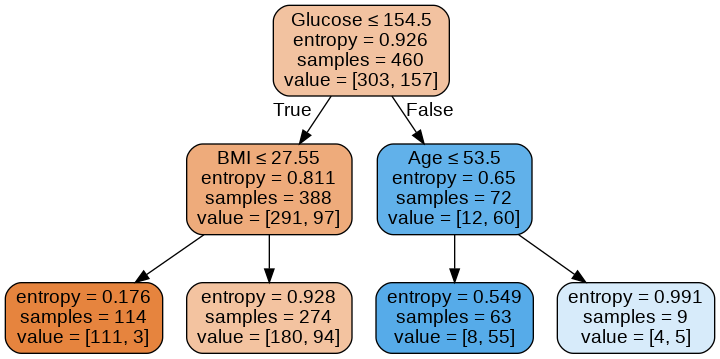

In [ ]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dTree, out_file=dot_data, feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())